In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [108]:
df = pd.read_csv('/content/drive/MyDrive/ExcelRDataset/bank-full.csv')
df.rename(columns={'y':'result'},inplace=True)
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,result
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [109]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [110]:
df.nunique().sort_values(ascending=False)

balance      7168
duration     1573
pdays         559
age            77
campaign       48
previous       41
day            31
job            12
month          12
poutcome        4
education       4
contact         3
marital         3
loan            2
housing         2
default         2
result          2
dtype: int64

In [111]:
# find duplicate row
dup_data = df[df.duplicated()]
len(dup_data)

0

In [112]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
result       0
dtype: int64

In [113]:
# find the correlation
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


## **Data Analysis**

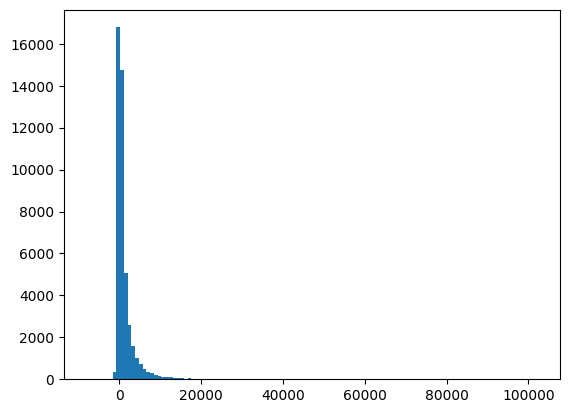

In [135]:
plt.hist(df['balance'],bins=120)
plt.show()

<Axes: xlabel='marital', ylabel='balance'>

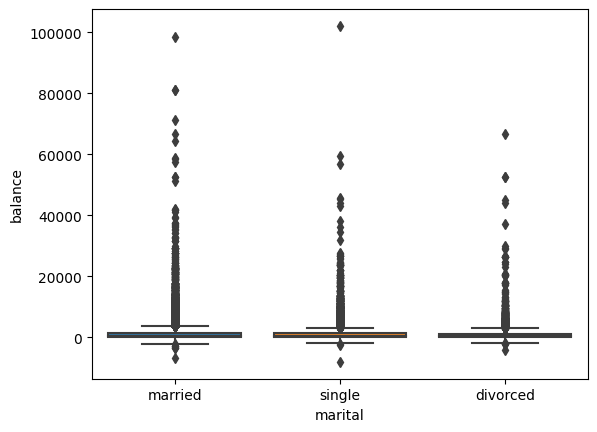

In [138]:
sns.boxplot(y=df['balance'],x=df['marital'])

(array([4., 2., 2., 2., 2., 7., 3., 2., 5., 7., 9., 4., 0., 0., 0., 0., 1.,
        0., 0., 2.]),
 array([29.  , 31.75, 34.5 , 37.25, 40.  , 42.75, 45.5 , 48.25, 51.  ,
        53.75, 56.5 , 59.25, 62.  , 64.75, 67.5 , 70.25, 73.  , 75.75,
        78.5 , 81.25, 84.  ]),
 <BarContainer object of 20 artists>)

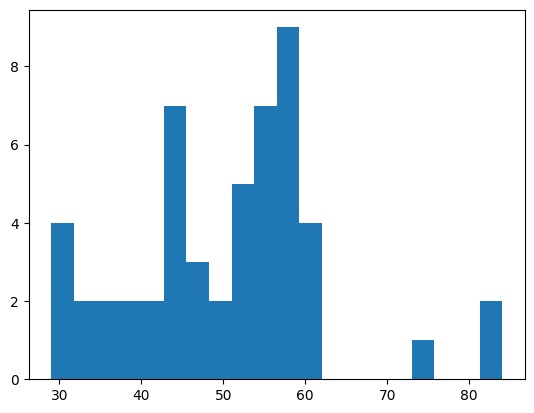

In [159]:
plt.hist(df[df['balance']>30000]['age'],bins=20)

<Axes: xlabel='age', ylabel='balance'>

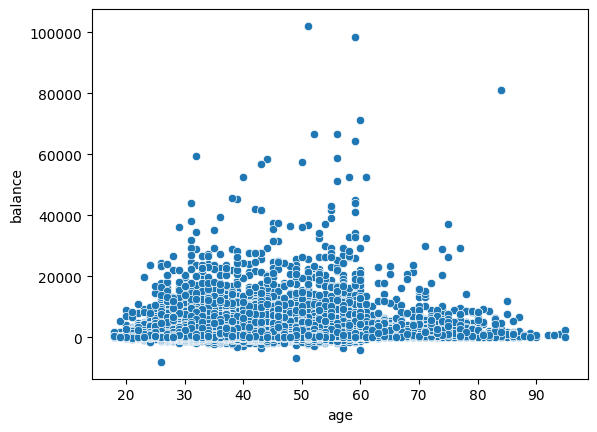

In [162]:
sns.scatterplot(x='age',y='balance',data=df)

## **Data Cleaning**


In [115]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'result'],
      dtype='object')

In [116]:
clean_data = df[['marital','housing','loan','age', 'balance', 'duration', 'campaign', 'pdays', 'previous','result']]
clean_data['result'] = clean_data['result'].map({'no':0,'yes':1})
clean_data['marital'] = clean_data['marital'].map({'divorced':0,'single':1,'married':2})


<ipython-input-116-205771909088>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['result'] = clean_data['result'].map({'no':0,'yes':1})
<ipython-input-116-205771909088>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['marital'] = clean_data['marital'].map({'divorced':0,'single':1,'married':2})


In [117]:
clean_data.corr()

,marital,age,balance,duration,campaign,pdays,previous,result
marital,1.000000,0.126351,0.028172,-0.018834,0.029294,-0.020832,-0.006876,-0.043846
age,0.126351,1.000000,0.097783,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.028172,0.097783,1.000000,0.021560,-0.014578,0.003435,0.016674,0.052838
duration,-0.018834,-0.004648,0.021560,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.029294,0.004760,-0.014578,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.020832,-0.023758,0.003435,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,-0.006876,0.001288,0.016674,0.001203,-0.032855,0.454820,1.000000,0.093236
result,-0.043846,0.025155,0.052838,0.394521,-0.073172,0.103621,0.093236,1.000000


<Axes: xlabel='result', ylabel='pdays'>

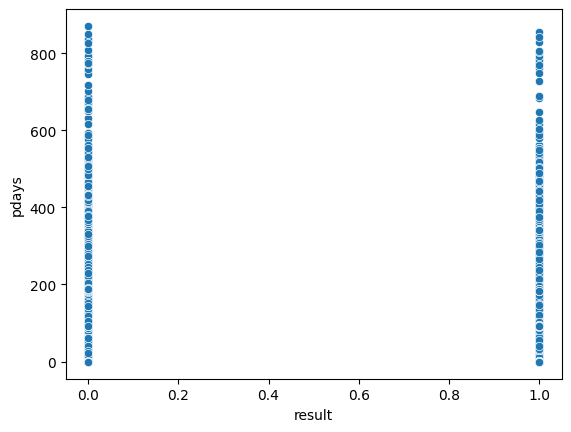

In [118]:
sns.scatterplot(x='result',y='pdays',data=clean_data)

<Axes: xlabel='result', ylabel='balance'>

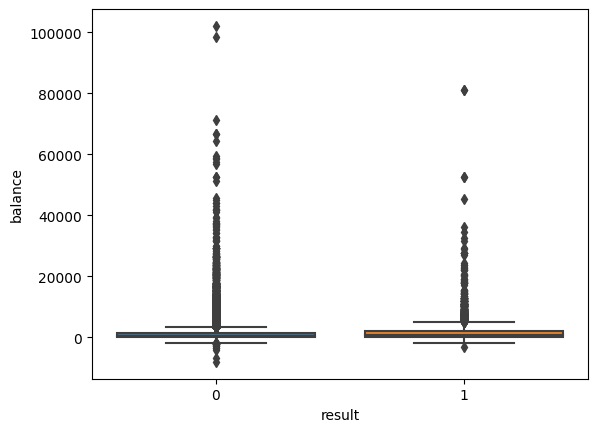

In [130]:
sns.boxplot(x='result',y='balance',data=clean_data)

In [120]:
X = clean_data.iloc[:,:-1]
y = clean_data.iloc[:,-1]
X

,marital,housing,loan,age,balance,duration,campaign,pdays,previous
0,2,yes,no,58,2143,261,1,-1,0
1,1,yes,no,44,29,151,1,-1,0
2,2,yes,yes,33,2,76,1,-1,0
3,2,yes,no,47,1506,92,1,-1,0
4,1,no,no,33,1,198,1,-1,0
...,...,...,...,...,...,...,...,...,...
45206,2,no,no,51,825,977,3,-1,0
45207,0,no,no,71,1729,456,2,-1,0
45208,2,no,no,72,5715,1127,5,184,3
45209,2,no,no,57,668,508,4,-1,0


In [121]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[0,1,2])],remainder='passthrough')
X = np.array(ct.fit_transform(X))
X = X[:,1:]
X

array([[  0.,   1.,   0., ...,   1.,  -1.,   0.],
       [  1.,   0.,   0., ...,   1.,  -1.,   0.],
       [  0.,   1.,   0., ...,   1.,  -1.,   0.],
       ...,
       [  0.,   1.,   1., ...,   5., 184.,   3.],
       [  0.,   1.,   1., ...,   4.,  -1.,   0.],
       [  0.,   1.,   1., ...,   2., 188.,  11.]])

In [122]:
from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(X,y)

array([0.00182808, 0.01017856, 0.01455694, 0.01610314, 0.010633  ,
       0.00150198, 0.01108432, 0.02193228, 0.07362695, 0.00382626,
       0.02539838, 0.0125177 ])

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [147]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train,y_train)


LogisticRegression()

In [148]:
y_pred = lg.predict(X_test)
y_pred
from sklearn.metrics import accuracy_score,confusion_matrix
ac_score = accuracy_score(y_test,y_pred)
ac_score


0.8877584872276899

In [149]:
confusion_matrix(y_test,y_pred)

array([[7803,  177],
       [ 838,  225]])

<Axes: >

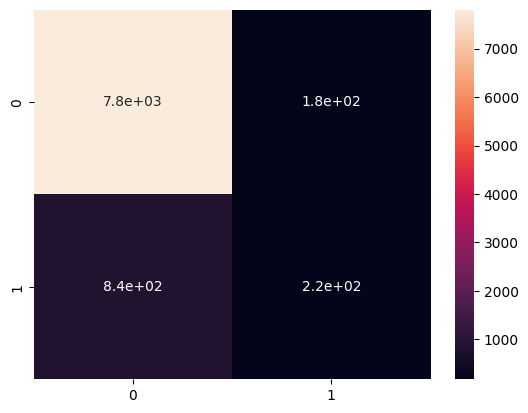

In [150]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

<Axes: xlabel='result', ylabel='count'>

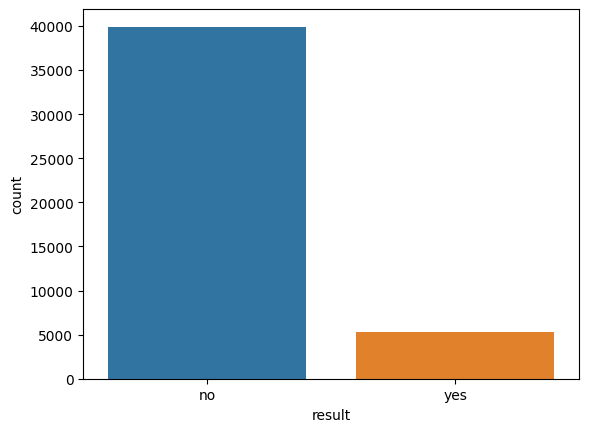

In [128]:
sns.countplot(x=df['result'])